<div style="text-align: left; background-color:#E9F7EF; font-family:Arial; color:#526085; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 58px;border-style: solid;border-color: dark green;"> MLP - Multiclass Classification</div>


<div class="list-group" id="list-tab" role="tablist">
    <h3 style="text-align: left; background-color: #ACA224; font-family:Tahoma; color: white; padding: 14px; line-height: 1; border-radius:10px"><b>Requirements 📝</b></h3>

* Not drop NA, drop missing
* Models: Compare all models that you have learned or practiced
* Can use Pytorch & Tensorflow (Neural Network or Deep Neural Network)

* Nếu làm không tốt hoặc hiểu không kĩ, thì tune sẽ rất lâu
* Code thành file có các step như homework lúc trước
* Có thể sử dụng thư viện ngoài thì phải có lý do hợp lý như pytorch hay tensorflow
* Drop missing value với 4 features trở lên có NA -> Hoặc build decision tree cho missing values

* Giải thích bước làm
* Conclusion 

* TPOT2 ALPHA library (AUTO ML): tim hieu nhung khong duoc su dung, khong nen dung

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)
%matplotlib inline
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

from sklearn.svm import SVC # SVM
from sklearn.tree import DecisionTreeClassifier # DT
from sklearn.ensemble import RandomForestClassifier # RF
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.naive_bayes import GaussianNB, BernoulliNB


# **Data Understanding**

In [2]:
df = pd.read_csv("C:\\Users\\laito\\OneDrive - VNU-HCMUS\\Jupyter Hub\\KHDL\\KHDL-MACHINE LEARNING\\Labs\\Final\\Banking.csv")
df.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


</div><div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:120%; text-align:left">

<h3 align="center"> <font color=lightgreen>📊 Description:</font></h3>
The given dataset is the information about banking loan applications. It includes a variety of features related to the applicants and their loan requests. Here is a description of each feature:

1. Loan_ID: A unique identifier for each loan application.
2. Loan_Amount_Requested: The amount of money requested by the applicant for the loan.
3. Length_Employed: The length of time the applicant has been employed. Expressed in years.
4. Home_Owner: The type of home ownership of the applicant (e.g., Rent, Mortgage, Own).
5. Annual_Income: The annual income of the applicant.
6. Income_Verified: Indicates whether the applicant's income has been verified or not.
7. Purpose_Of_Loan: The purpose for which the loan is being requested (e.g., car, debt consolidation).
8. Debt_To_Income: The ratio of the applicant's monthly debt payments to their monthly gross income.
> This feature is a measure of the proportion of an individual's income dedicated to debt repayment. A lower ratio implies a lower risk of defaulting on loan payments, making the applicant appear more creditworthy.

9. Inquiries_Last_6Mo: The number of inquiries made by creditors during the last 6 months.
10. Months_Since_Deliquency: The number of months since the applicant's last delinquency. It can be missing value or non-missing value.
* Missing Value: If the value is missing or NaN for a particular instance, it indicates that there have been no delinquencies for that borrower, or the information about delinquencies is not available.
* Non-Missing Value: If a specific number of months is provided, it signifies the time that has elapsed since the borrower's last delinquency event. A higher value indicates a longer duration of consistent payments without any delinquency.
> This feature provide valuable insights into a borrower's credit history and repayment behavior. Borrowers with a longer period since their last delinquency are generally seen as having a more favorable credit history, indicating a lower likelihood of defaulting on future loan payments.
* For example, if the "Months_Since_Deliquency" value is 12, it means that the person has successfully made on-time payments for the past year without any delinquencies. This demonstrates a positive credit behavior and indicates that the individual has been managing their credit responsibly.

11. Number_Open_Accounts: The total number of open credit accounts.
> Consider this feature as a factor in evaluating an individual's creditworthiness. Having a `moderate` number of open accounts can demonstrate a healthy credit profile, indicating the person's ability to manage credit responsibly. Usually having 2 to 5 credit cards is moderate



12. Total_Accounts: The total number of credit accounts held by the applicant.
> `Credit Utilization`: The "Number_Open_Accounts", "Debt_To_Income" or "Total_Accounts," can provide insights into the individual's credit utilization. Credit utilization refers to the percentage of available credit that a person has utilized. A lower utilization rate is generally considered favorable, as it indicates that the individual is not heavily reliant on credit.

13. Gender: The gender of the applicant.
14. Interest_Rate: The target variable, representing the interest rate assigned to the loan application (multiclass classification).


# **Data Analysis**
> Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.

In [3]:
df['Debt_To_Income']

0         18.37
1         14.93
2         15.88
3         14.34
4         22.17
          ...  
164304    13.56
164305     9.12
164306    18.17
164307    18.75
164308    19.44
Name: Debt_To_Income, Length: 164309, dtype: float64

In [4]:
df['Annual_Income']

0         68000.0
1             NaN
2         75566.4
3         56160.0
4         96000.0
           ...   
164304        NaN
164305        NaN
164306        NaN
164307        NaN
164308        NaN
Name: Annual_Income, Length: 164309, dtype: float64

In [5]:
df.dtypes

Loan_ID                      int64
Loan_Amount_Requested       object
Length_Employed             object
Home_Owner                  object
Annual_Income              float64
Income_Verified             object
Purpose_Of_Loan             object
Debt_To_Income             float64
Inquiries_Last_6Mo           int64
Months_Since_Deliquency    float64
Number_Open_Accounts         int64
Total_Accounts               int64
Gender                      object
Interest_Rate                int64
dtype: object

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Loan_ID,164309.0,1.008216e+07,47432.067027,10000001.0,10041078.00,10082155.00,10123232.00,10164309.00
Annual_Income,139207.0,7.333116e+04,60377.498294,4000.0,45000.00,63000.00,88697.50,7500000.00
Debt_To_Income,164309.0,1.720719e+01,7.845083,0.0,11.37,16.84,22.78,39.99
Inquiries_Last_6Mo,164309.0,7.816979e-01,1.034747,0.0,0.00,0.00,1.00,8.00
Months_Since_Deliquency,75930.0,3.422936e+01,21.761180,0.0,16.00,31.00,50.00,180.00
Number_Open_Accounts,164309.0,1.119382e+01,4.991813,0.0,8.00,10.00,14.00,76.00
Total_Accounts,164309.0,2.506767e+01,11.583067,2.0,17.00,23.00,32.00,156.00
Interest_Rate,164309.0,2.158951e+00,0.738364,1.0,2.00,2.00,3.00,3.00


In [7]:
# from pandas_profiling import ProfileReport
# ProfileReport(df)

</div><div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:120%; text-align:left">

<h3 align="center"> <font color=lightgreen>📊 Inference:</font></h3>

* Total of `14 features` which are 7 Numeric Variables and 7 Categorical Variables
* Total of `146211 missing variables` in the dataset, which is enormous.
* Cut down some unwanted features like `Loan_ID`
* Missing values in `Length_Employed`, `Home_Owner`, `Annual_Income`, `Months_Since_Deliquency`
* Income_Verified having 2 categorical values which are `VERIFIED - income` and `VERIFIED - income source` implys that the applicant's income has been verified

In [8]:
missing_columns = ['Length_Employed', 'Home_Owner', 'Annual_Income', 'Months_Since_Deliquency']

# **Data Preprocessing**

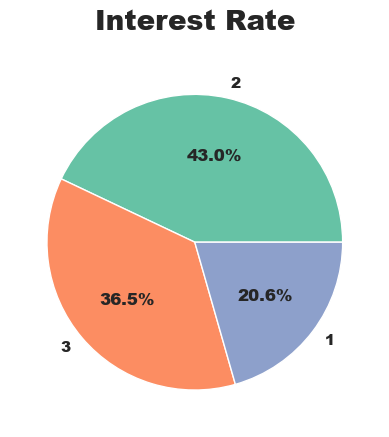

In [9]:
count = df["Interest_Rate"].value_counts()

plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"})
plt.title("Interest Rate",fontweight="black",size=20,pad=20)
plt.show()

</div><div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:120%; text-align:left">

<h3 align="center"> <font color=lightgreen>📊 Inference:</font></h3>

* There is **pretty class-balance**

In [10]:
print('Total', df.shape[0], 'samples')
(df.isnull().sum() / len(df) * 100).to_frame().rename(columns={0:"Total No. of Missing Values"})

Total 164309 samples


,Total No. of Missing Values
Loan_ID,0.000000
Loan_Amount_Requested,0.000000
Length_Employed,4.486060
Home_Owner,15.433725
Annual_Income,15.277313
Income_Verified,0.000000
Purpose_Of_Loan,0.000000
Debt_To_Income,0.000000
Inquiries_Last_6Mo,0.000000
Months_Since_Deliquency,53.788289


In [11]:
df.describe(include="object").T

,count,unique,top,freq
Loan_Amount_Requested,164309,1290,"10,000",11622
Length_Employed,156938,11,10+ years,52915
Home_Owner,138950,4,Mortgage,70345
Income_Verified,164309,3,VERIFIED - income,59421
Purpose_Of_Loan,164309,14,debt_consolidation,97101
Gender,164309,2,Male,117176


In [12]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

> Note: Nếu có hơn 2 feature ở một sample là null thì drop cột đấy

In [13]:
from sklearn.impute import SimpleImputer
def preprocessing_data(df):
    # Todo: preprocess data
    # Remove the unnecessary column
    df = df.drop(columns = ['Loan_ID'], axis = 1)
    
    # Convert categorical to numerical
    df['Loan_Amount_Requested'] = pd.to_numeric(df['Loan_Amount_Requested'].str.replace(',', '').astype(int), errors='coerce')
    
    # Handling Missing Values
    imputer_mode = SimpleImputer(strategy='most_frequent')
    imputer_mean = SimpleImputer(strategy = 'mean')
    imputer_zero = SimpleImputer(strategy='constant', fill_value=0)
    
    df[['Length_Employed']] = imputer_mode.fit_transform(df[['Length_Employed']])
    df[['Home_Owner']] = imputer_mode.fit_transform(df[['Home_Owner']])
    df[['Annual_Income']] = imputer_mode.fit_transform(df[['Annual_Income']])
    
    df[['Months_Since_Deliquency']] = imputer_zero.fit_transform(df[['Months_Since_Deliquency']])
    
    return df

In [14]:
# no effect to the original data
df = preprocessing_data(df.copy())

In [15]:
df.isnull().sum()

Loan_Amount_Requested      0
Length_Employed            0
Home_Owner                 0
Annual_Income              0
Income_Verified            0
Purpose_Of_Loan            0
Debt_To_Income             0
Inquiries_Last_6Mo         0
Months_Since_Deliquency    0
Number_Open_Accounts       0
Total_Accounts             0
Gender                     0
Interest_Rate              0
dtype: int64

# **Exploratory Data Analysis**
* Feature Scaling
Scale numerical features (e.g., "Loan_Amount_Requested," "Annual_Income," "Debt_To_Income," "Inquiries_Last_6Mo," "Months_Since_Deliquency," "Number_Open_Accounts," and "Total_Accounts") to bring them to a similar range. Common scaling techniques are Min-Max scaling or Standardization.


In [16]:
categorical_cols = [feature for feature in df.columns if df[feature].dtype == 'O']
numerical_cols = [feature for feature in df.columns if df[feature].dtype != 'O']

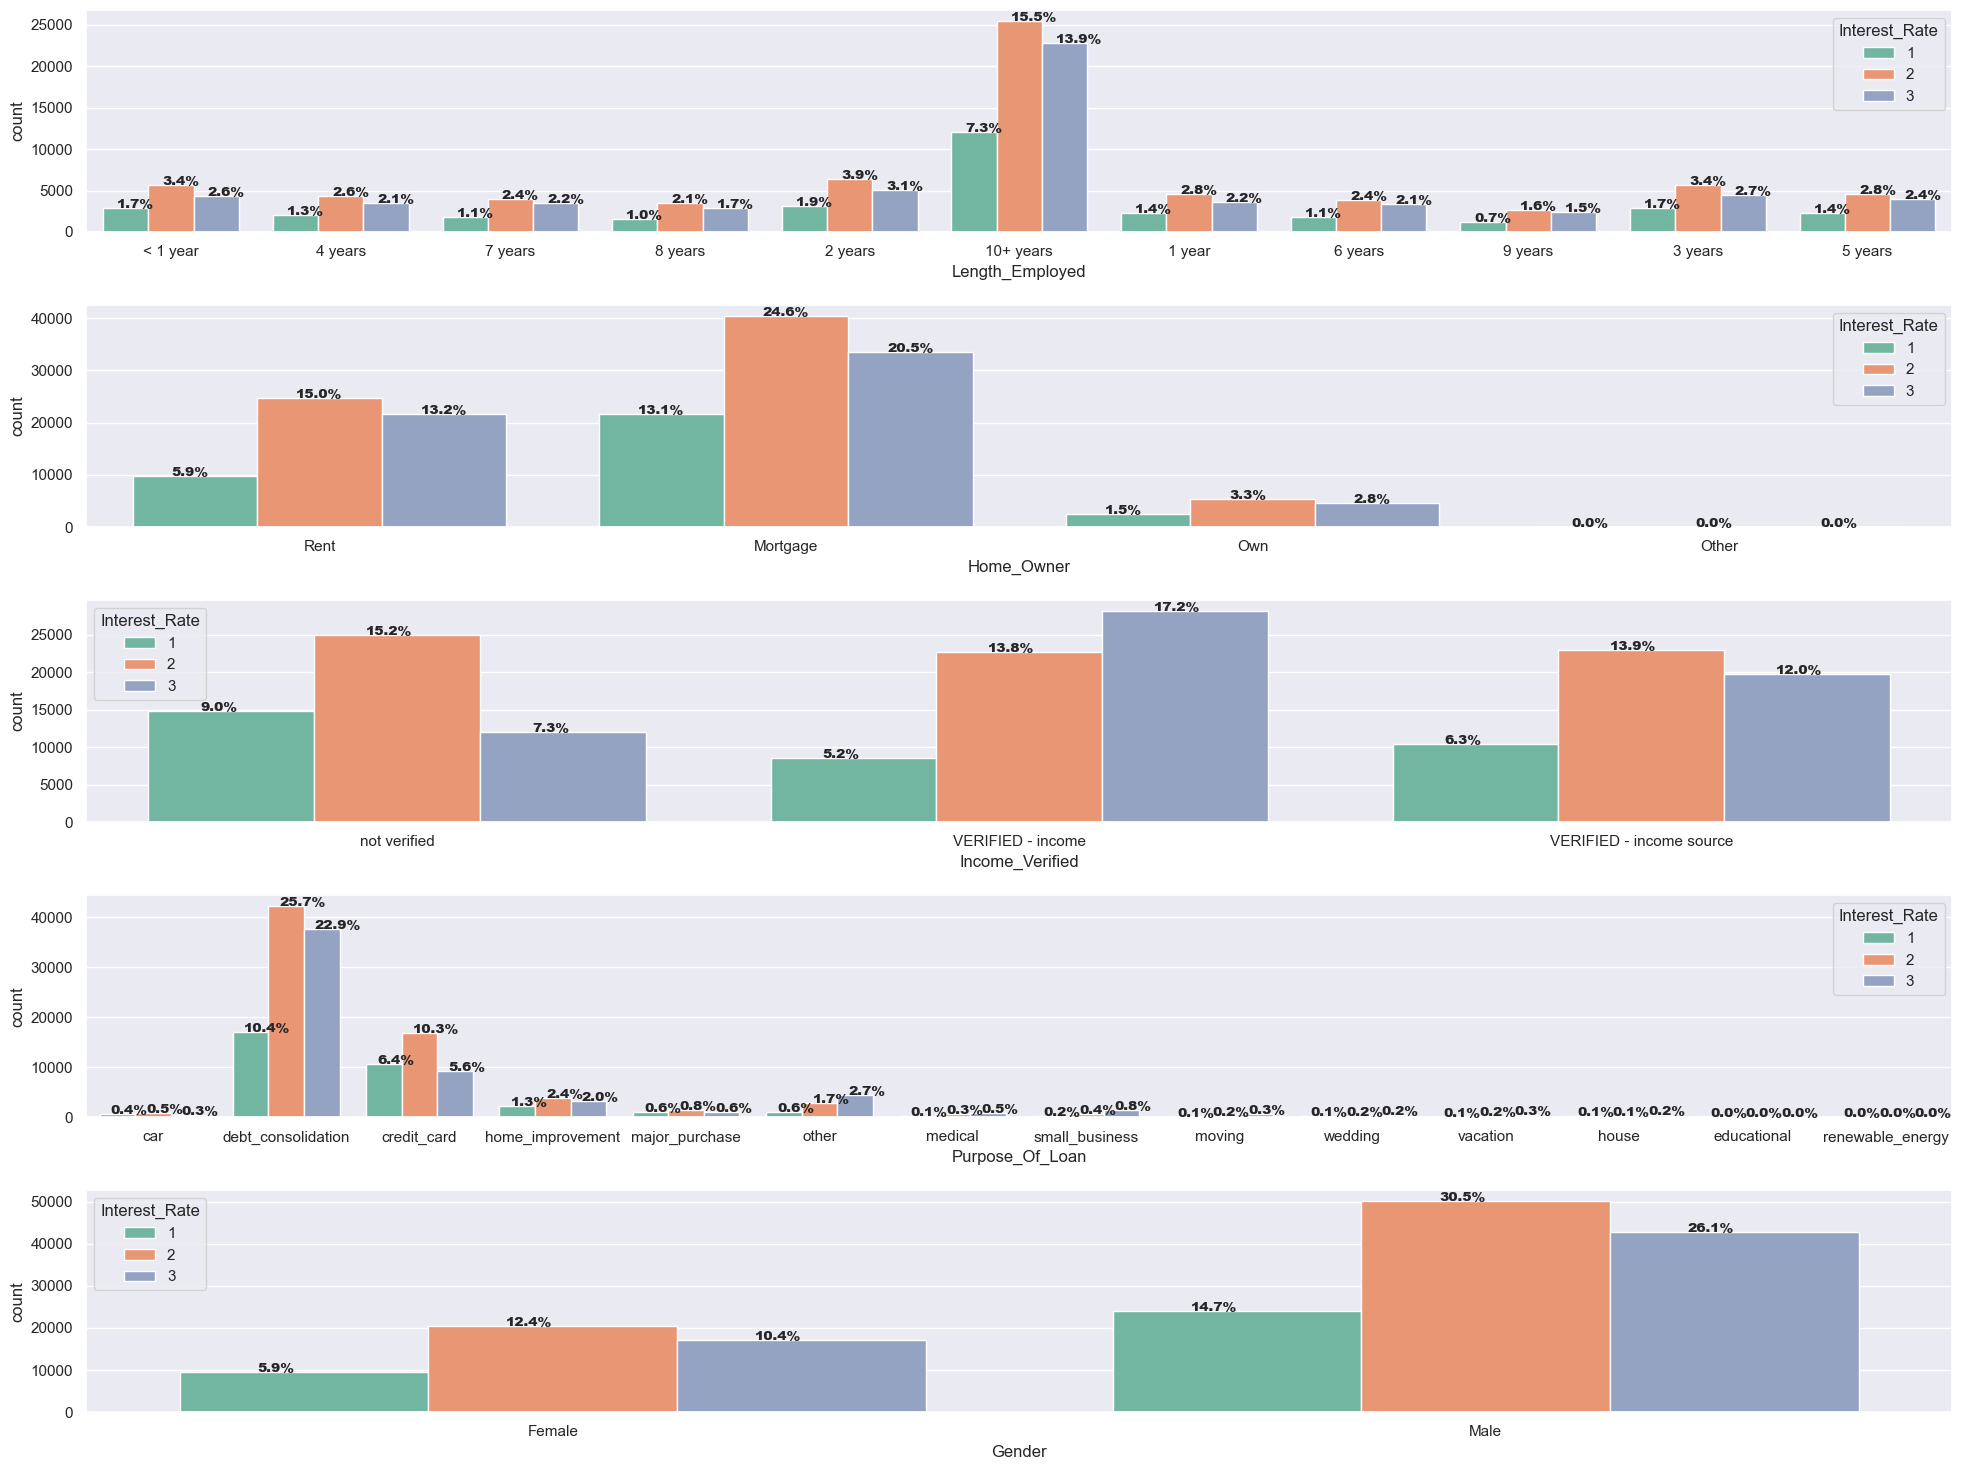

In [17]:
fig, axes = plt.subplots(len(categorical_cols), 1 , figsize = (20, 3 * len(categorical_cols)), sharex = False, sharey = False)
for i, column in enumerate(categorical_cols):
  ax = sns.countplot(x=column, data=df, ax=axes[i], hue="Interest_Rate", palette="Set2")
  for value in ax.patches:
        percentage = "{:.1f}%".format(100*value.get_height()/len(df[column]))
        x = value.get_x() + value.get_width() / 2 - 0.05
        y = value.get_y() + value.get_height()
        ax.annotate(percentage, (x,y), fontweight="black",size=10)
plt.tight_layout(pad=1.5)
plt.show()

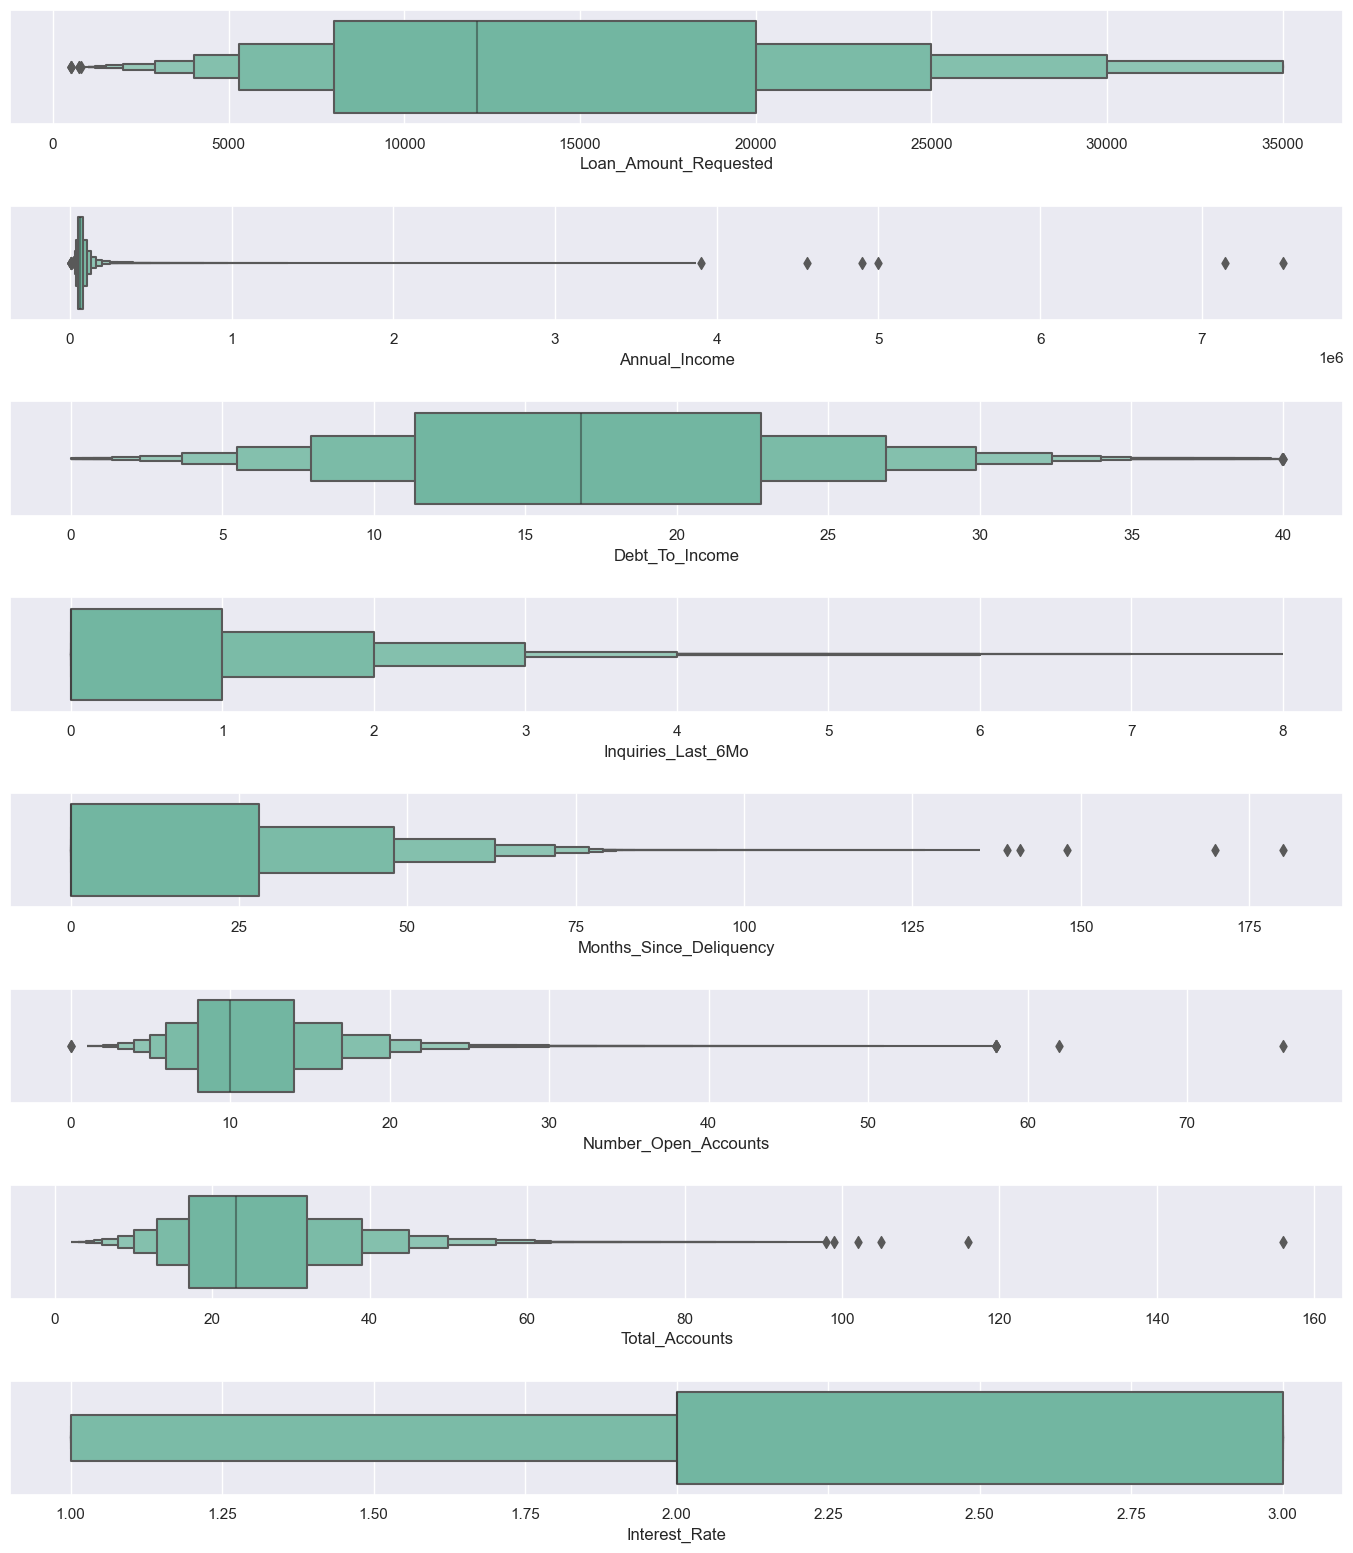

In [18]:
fig, axes=plt.subplots(len(numerical_cols), 1, figsize=(14, 2*len(numerical_cols)),sharex=False,sharey=False)

for i, column in enumerate(numerical_cols):
    sns.boxenplot(x=column,data=df,palette='Set2',ax=axes[i])
plt.tight_layout(pad=2.0)

> Inquiries_Last_6Mo này nên là biến categorical

## **Handle Outliers**

In [36]:
df['Annual_Income'].quantile([0.25,0.75])

0.25    48600.0
0.75    82000.0
Name: Annual_Income, dtype: float64

In [21]:
outlier_columns = ['Annual_Income', 'Number_Open_Accounts', 'Total_Accounts']
for col in outlier_columns:
    lower_limit, upper_limit = df[col].quantile([0.25,0.75])
    IQR = upper_limit - lower_limit
    lower_whisker = lower_limit - 1.5 * IQR
    upper_whisker = upper_limit + 1.5 * IQR
    df[col] = np.where(df[col]<lower_whisker, lower_whisker, np.where(df[col]>upper_whisker, upper_whisker,df[col]))

## **Visualization after Outlier Processing**

In [22]:
def numerical_plot(column, df):
    plt.figure(figsize=(13,6))
    plt.subplot(1,2,1)
    # sns.histplot(data = df, x = column, hue = 'churn_risk_score', kde = True, palette = 'Set2')
    sns.kdeplot(data = df, x = column, hue = 'Interest_Rate', palette='Set2', shade = True)
    plt.title(f"Distribution of {column} by Interest Rate",fontweight="black",pad=20,size=11)
    
    plt.subplot(1,2,2)
    sns.boxenplot(data = df, x = column)
    plt.title(f"Distribution of {column} by Interest Rate",fontweight="black",pad=20,size=11)
    plt.tight_layout()
    plt.show()

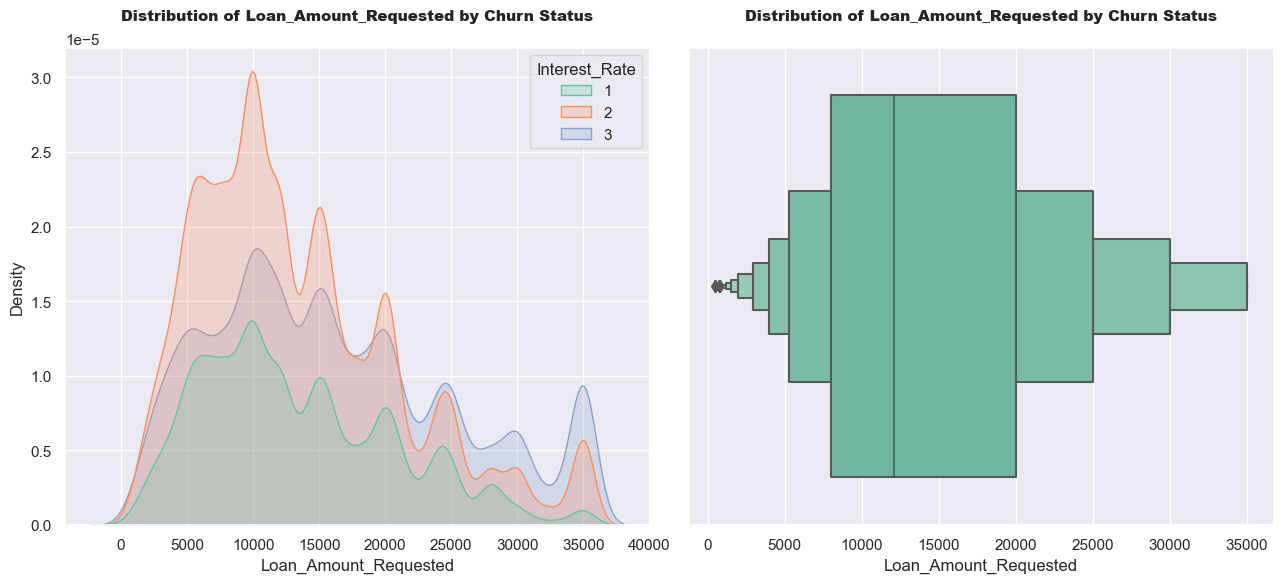

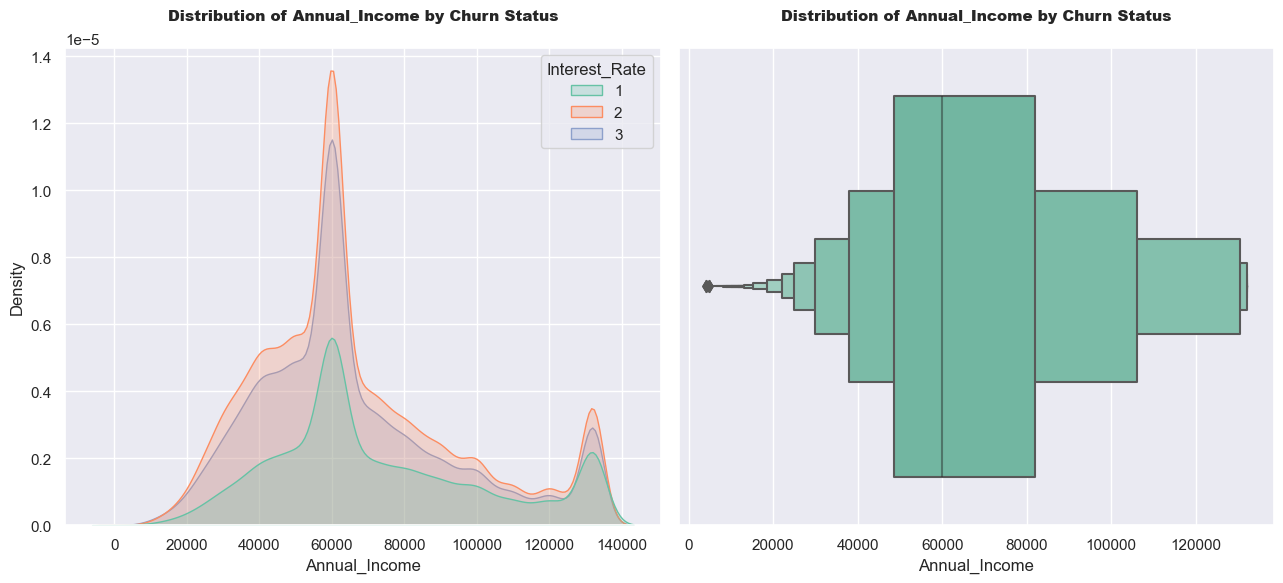

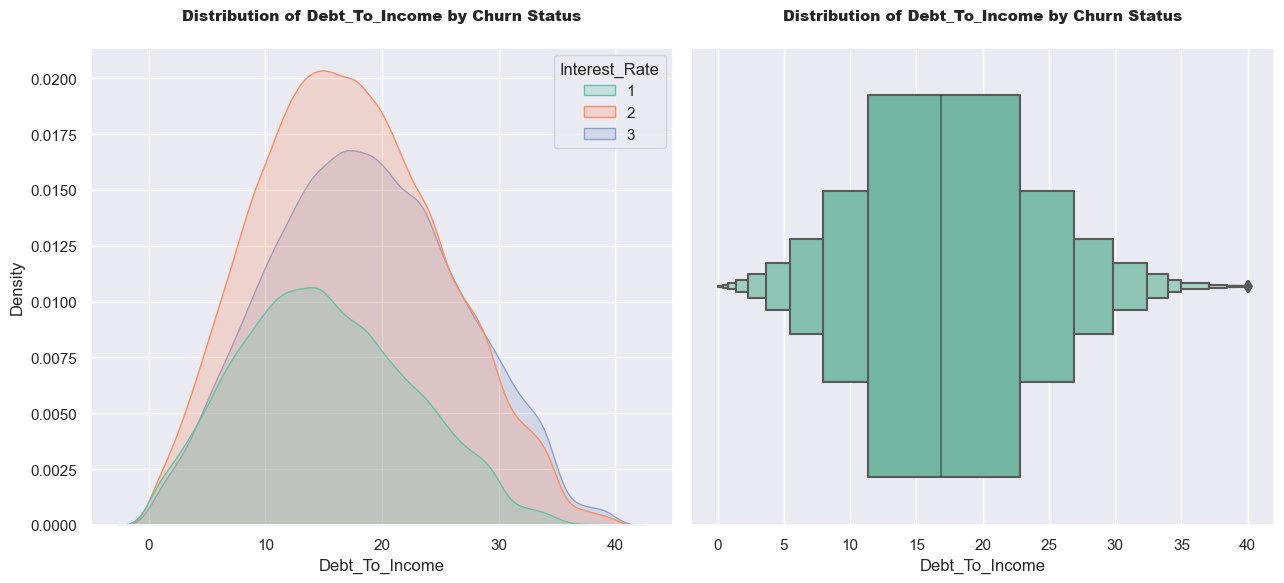

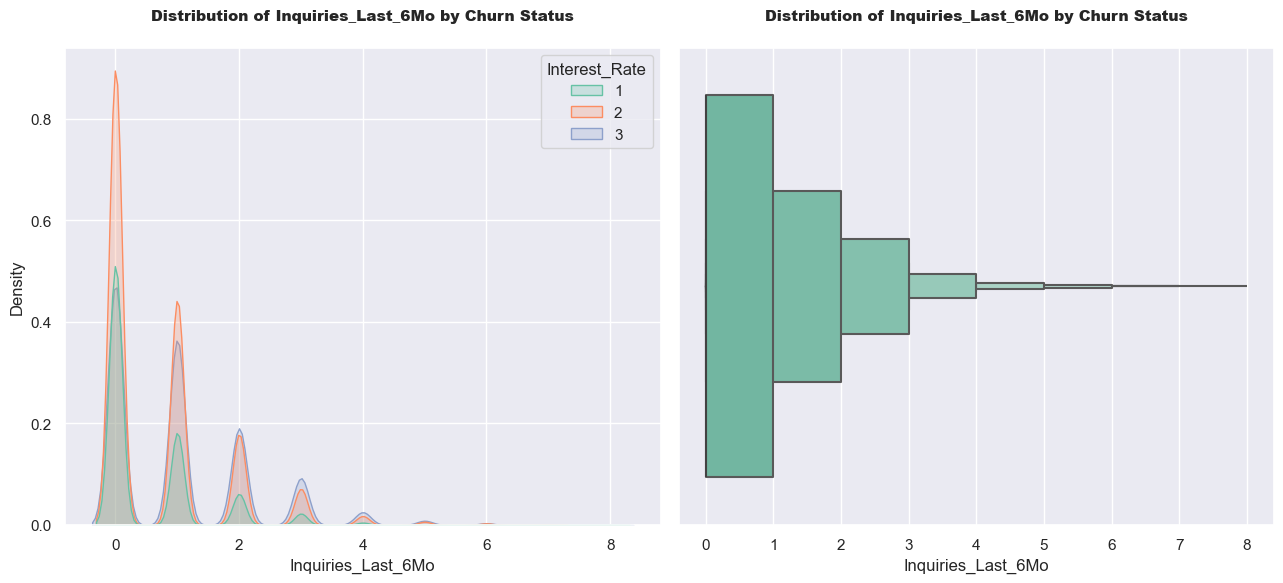

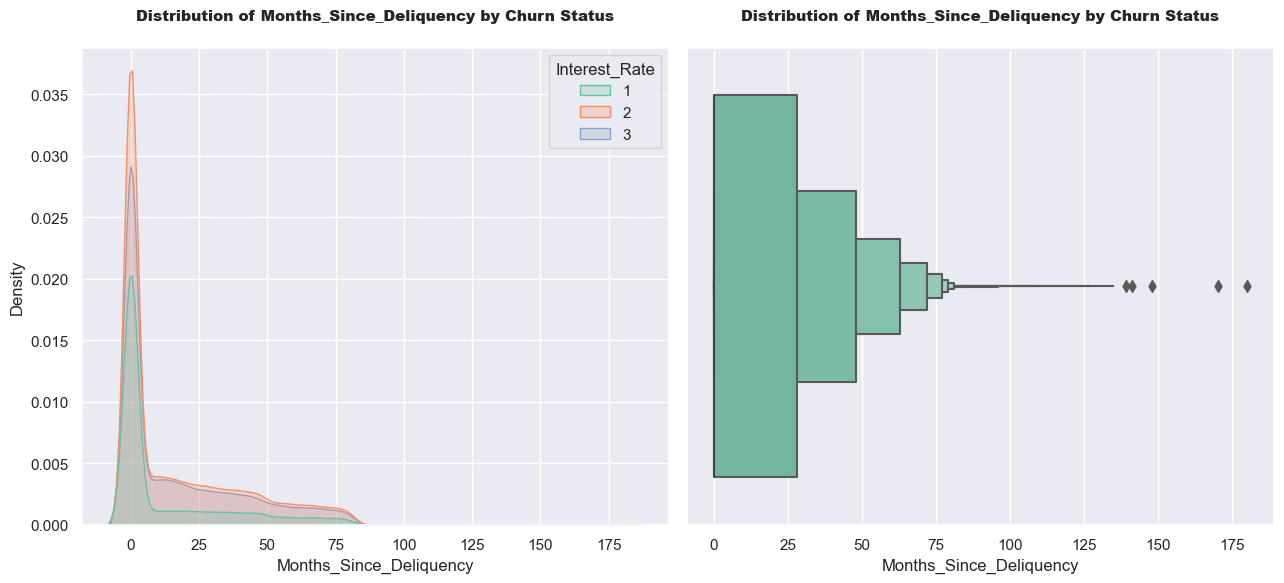

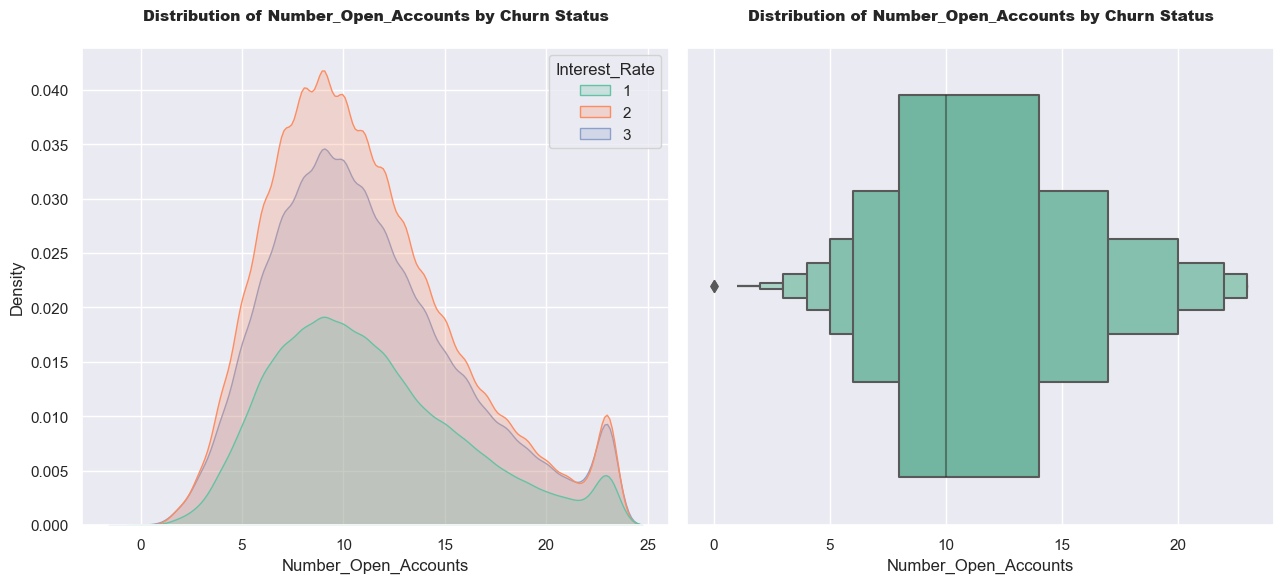

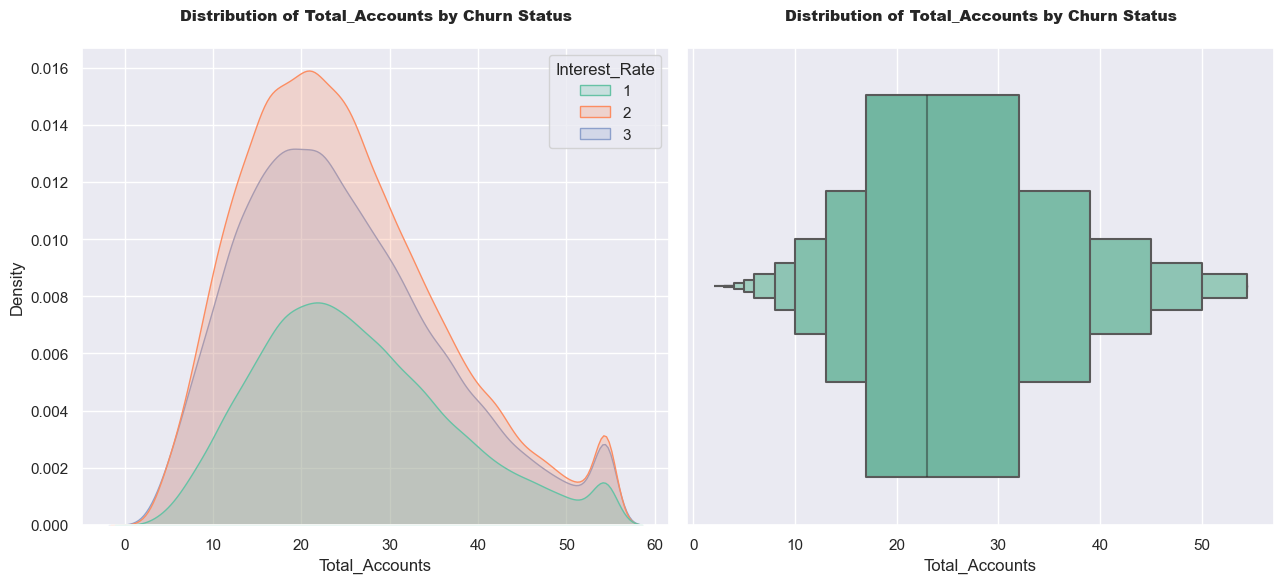

<Figure size 640x480 with 0 Axes>

In [23]:
for column in numerical_cols[:-1]:
  numerical_plot(column, df)
plt.tight_layout(pad=1.0)

# **Feature Exploration**

In [24]:
def plot_pie_chart(data):
    values = data.value_counts().values
    labels = data.value_counts().keys()
    plt.figure(figsize=(12,8),dpi=100)
    plt.pie(values,labels=labels,shadow=True,autopct='%1.2f%%')
    plt.show();

Length_Employed :


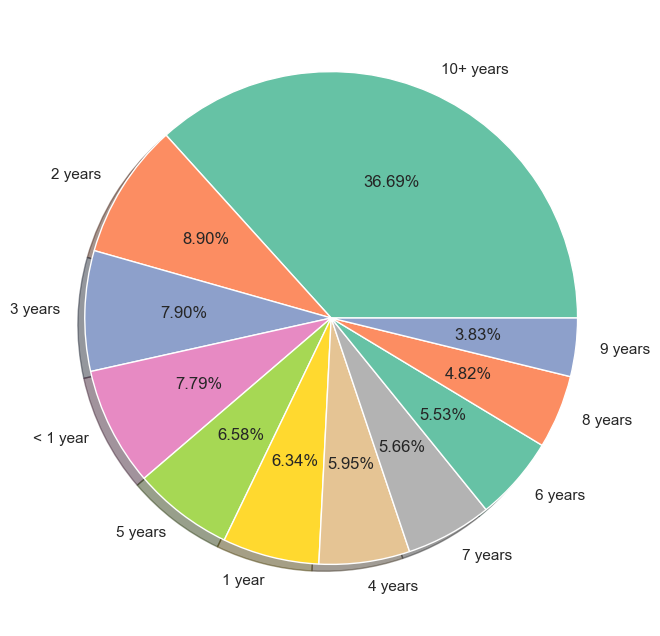

Home_Owner :


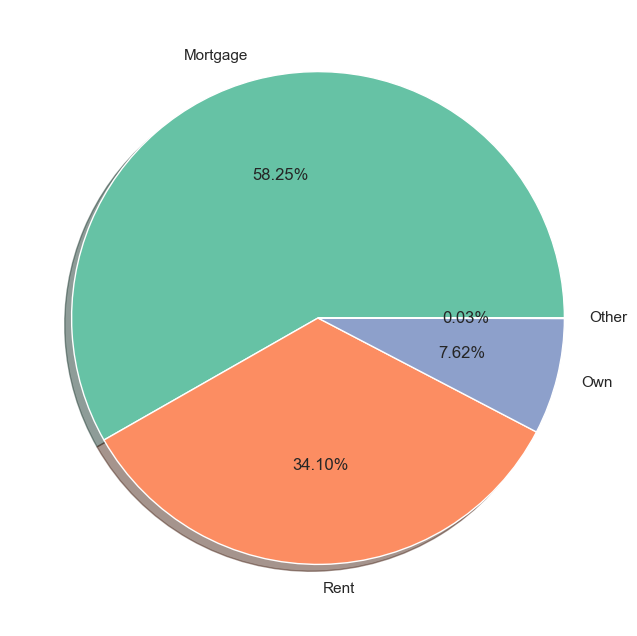

Income_Verified :


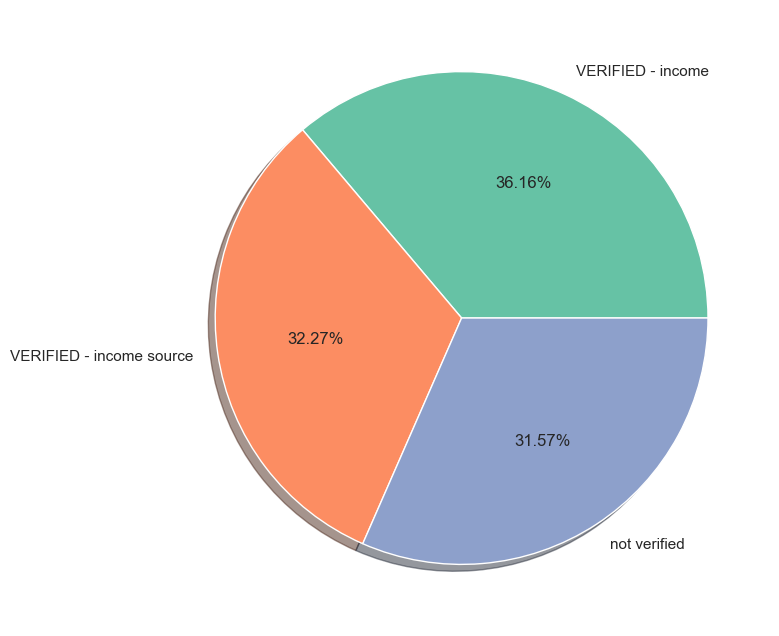

Purpose_Of_Loan :


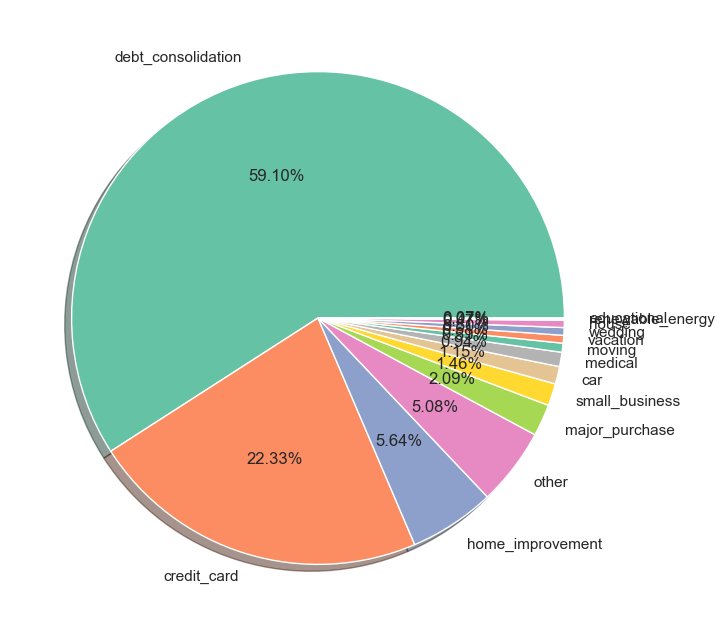

Gender :


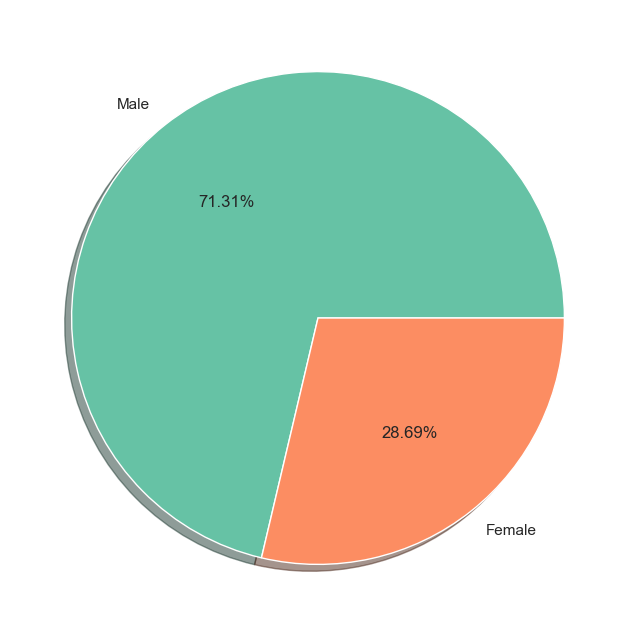

In [25]:
for col in categorical_cols:
  print(col,':')
  plot_pie_chart(df[col])

# **Feature Engineering**

In [26]:
def apply_feature_engineering(df):
    # Todo: Normalize your data
    
    # Perform label encoding
    label_columns = ['Gender', 'Purpose_Of_Loan', 'Income_Verified', 'Home_Owner', 'Length_Employed']
    for col in label_columns:
        print(col, ':')
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])
        df[col] = df[col].astype(int)
        print(label_encoder.classes_)
        print(label_encoder.transform(label_encoder.classes_))

    # # Perform one-hot encoding
    # onehot_encoder = OneHotEncoder(sparse=False)
    # onehot_encoded = onehot_encoder.fit_transform(df[['Length_Employed']])
    # df = pd.concat([df.drop(['Length_Employed'], axis=1), pd.DataFrame(onehot_encoded)], axis=1)
    return df
df = apply_feature_engineering(df)


Gender :
['Female' 'Male']
[0 1]
Purpose_Of_Loan :
['car' 'credit_card' 'debt_consolidation' 'educational' 'home_improvement'
 'house' 'major_purchase' 'medical' 'moving' 'other' 'renewable_energy'
 'small_business' 'vacation' 'wedding']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
Income_Verified :
['VERIFIED - income' 'VERIFIED - income source' 'not verified']
[0 1 2]
Home_Owner :
['Mortgage' 'Other' 'Own' 'Rent']
[0 1 2 3]
Length_Employed :
['1 year' '10+ years' '2 years' '3 years' '4 years' '5 years' '6 years'
 '7 years' '8 years' '9 years' '< 1 year']
[ 0  1  2  3  4  5  6  7  8  9 10]


<AxesSubplot:>

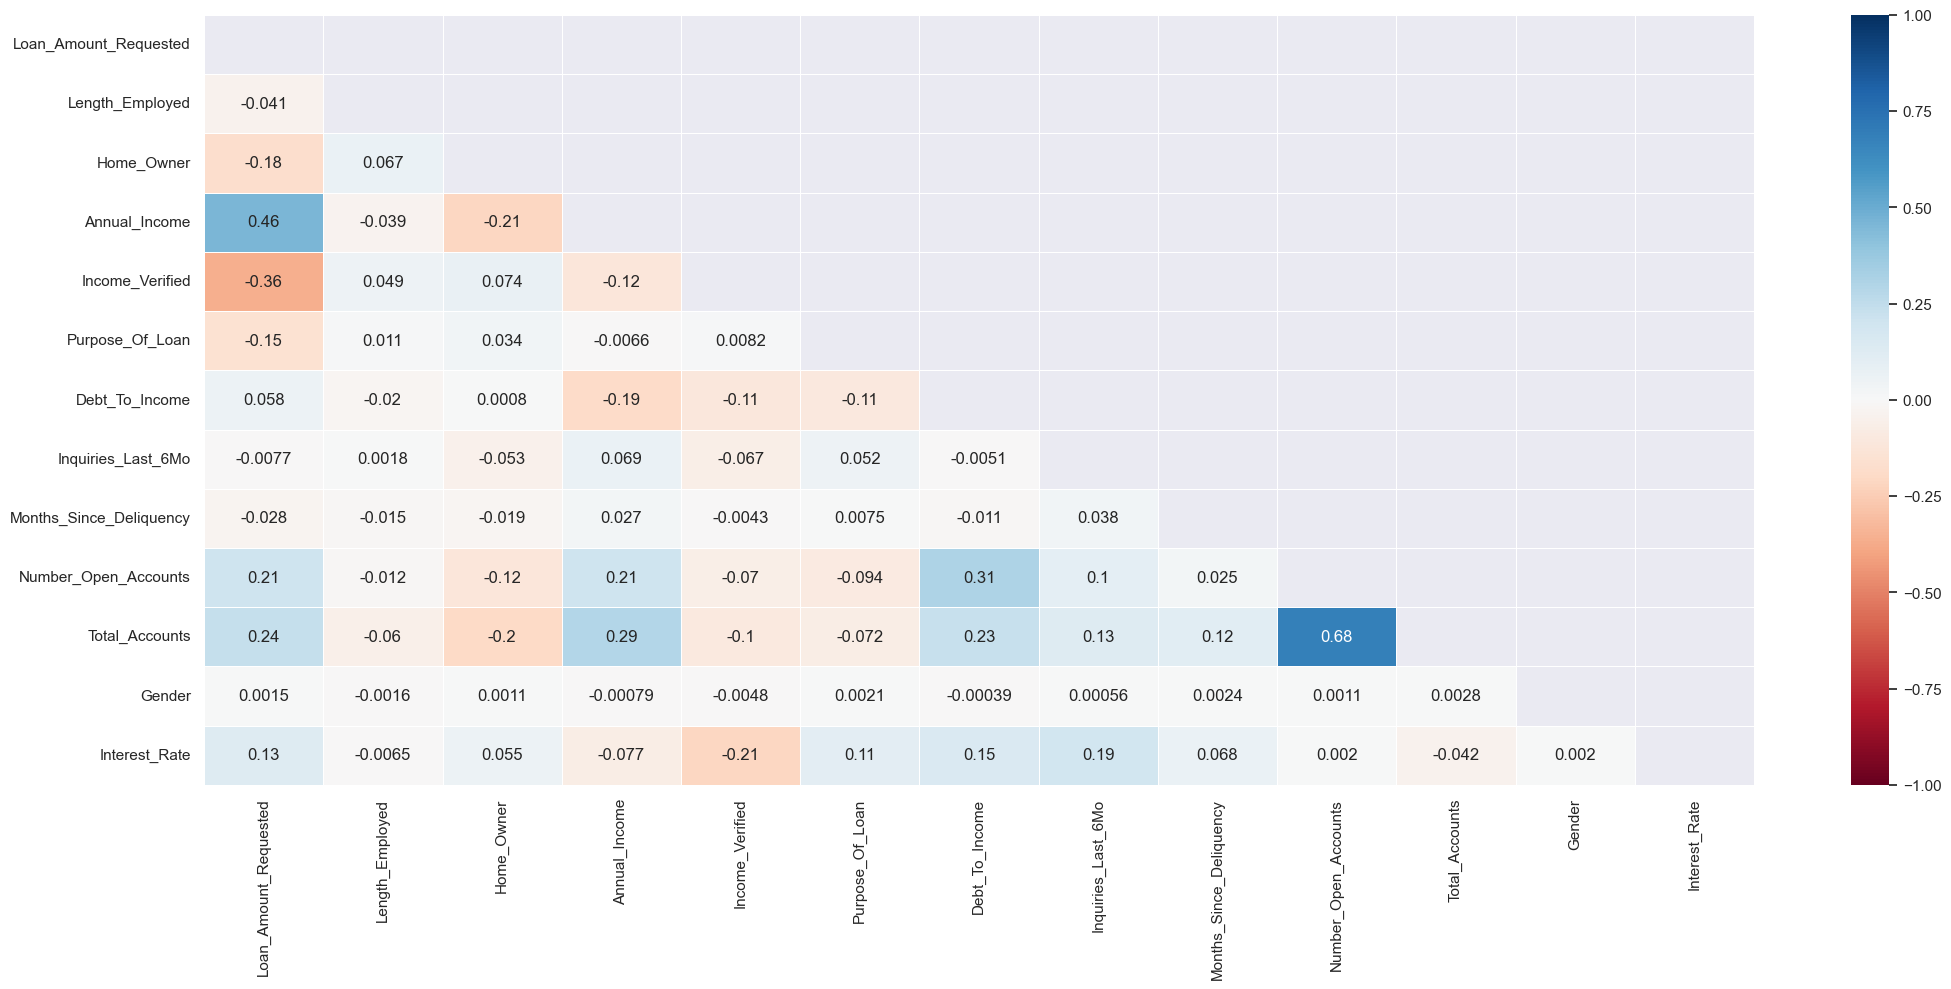

In [27]:
# Show heatmap after normalized data
corr = df.corr()
plt.figure(figsize = (25, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,mask=mask,cmap='RdBu', vmin=-1, vmax= 1 , center=0, annot=True,linewidth=0.5)

<AxesSubplot:title={'center':'Correlation Between Target based on All Features'}>

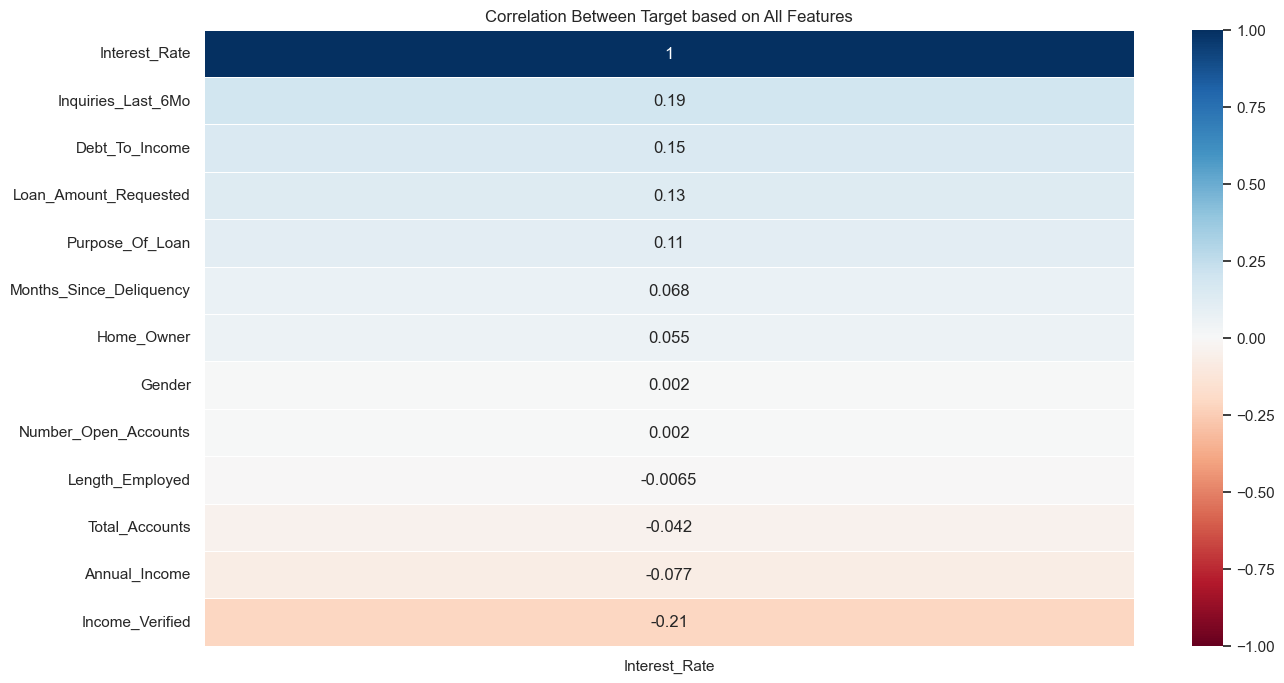

In [28]:
plt.figure(figsize=(15,8))
plt.title('Correlation Between Target based on All Features')
sns.heatmap(df.corr()[['Interest_Rate']].sort_values(by='Interest_Rate', ascending=False),cmap='RdBu', vmin=-1, vmax= 1 , center=0, annot=True,linewidth=.5,square=False)

In [29]:
# Checking skewness of numerical features
df[numerical_cols].skew().to_frame().rename(columns={0:"Feature Skewness"})

,Feature Skewness
Loan_Amount_Requested,0.727216
Annual_Income,0.769275
Debt_To_Income,0.192204
Inquiries_Last_6Mo,1.550867
Months_Since_Deliquency,1.305363
Number_Open_Accounts,0.663477
Total_Accounts,0.600940
Interest_Rate,-0.260932


In [30]:
df.isnull().sum()

Loan_Amount_Requested      0
Length_Employed            0
Home_Owner                 0
Annual_Income              0
Income_Verified            0
Purpose_Of_Loan            0
Debt_To_Income             0
Inquiries_Last_6Mo         0
Months_Since_Deliquency    0
Number_Open_Accounts       0
Total_Accounts             0
Gender                     0
Interest_Rate              0
dtype: int64

# **Model Training**

In [31]:
def prepare_X_y(df):
    X = df.drop('Interest_Rate', axis = 1)
    y = df['Interest_Rate']
    return X, y

X, y = prepare_X_y(df)

## *Train Test Split*

In [32]:
RANDOM_STATE = 42
TRAIN_SIZE = 0.7

X_train, X_test ,y_train, y_test = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

## *Model Selection*
* Common algorithms for multiclass classification include Random Forest, Support Vector Machines (SVM), Gradient Boosting, or Neural Networks, Naive Bayes, KNN


In [46]:
pipeline = Pipeline([
    ('scaler', StandardScaler()), # Feature Scaling
    ('classifier', DecisionTreeClassifier()) # Model
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the testing data
svm_pred = pipeline.predict(X_test)

# Evaluate the model
print(classification_report(y_test, svm_pred))

accuracy_svc = pipeline.score(X_test, y_test)
print(f"Decision tree accuracy is: {round(accuracy_svc * 100, 2)}%")

              precision    recall  f1-score   support

           1       0.31      0.32      0.32     10077
           2       0.45      0.45      0.45     21102
           3       0.47      0.46      0.47     18114

    accuracy                           0.43     49293
   macro avg       0.41      0.41      0.41     49293
weighted avg       0.43      0.43      0.43     49293

Decision tree accuracy is: 42.83%


In [47]:
pipeline = Pipeline([
    ('scaler', StandardScaler()), # Feature Scaling
    ('classifier', RandomForestClassifier()) # Model
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the testing data
svm_pred = pipeline.predict(X_test)

# Evaluate the model
print(classification_report(y_test, svm_pred))

accuracy_svc = pipeline.score(X_test, y_test)
print(f"RandomForestClassifier accuracy is: {round(accuracy_svc * 100, 2)}%")

              precision    recall  f1-score   support

           1       0.48      0.26      0.34     10077
           2       0.49      0.60      0.54     21102
           3       0.57      0.56      0.56     18114

    accuracy                           0.52     49293
   macro avg       0.51      0.47      0.48     49293
weighted avg       0.52      0.52      0.51     49293

RandomForestClassifier accuracy is: 51.64%


In [35]:
sdfsd

NameError: name 'sdfsd' is not defined

In [ ]:
models = []
models.append(('GaussianNB', GaussianNB()))
models.append(('BernoulliNB', BernoulliNB()))
models.append(('CategoricalNB', CategoricalNB()))
models.append(('MultinomialNB', MultinomialNB()))
models.append(('ComplementNB', ComplementNB()))
print(models)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
results = []
recalls = []
names = []
for name, model in models:
    model.fit(trainX, trainY)
    y_pred = model.predict(testX)
    acc = accuracy_score(testY, y_pred)
    rec = recall_score(testY, y_pred)
    results.append(acc)
    recalls.append(rec)
    names.append(name)
display(pd.DataFrame({"name": names, "accuracy score": results, "recall score": recalls}))

In [ ]:
def build_model(X, y):
  return 

def calculate_performance(y_true, y_pred):
  
  return 

# **Model Training & Evaluation**

In [ ]:
print(f'The number of records in training set is {X_train.shape[0]}')
y_train.value_counts(). to_frame()

# **Hyperparameter Tuning**
* Perform hyperparameter tuning to optimize the model's performance.

# **Make Prediction**
* Anticipate the "Interest_Rate" for upcoming data points.


<div style="border-radius:10px; border:black solid; padding: 15px; background-color: #E9F7EF; font-size:100%; text-align:left">
<p style="font-family:Georgia; font-weight:bold; letter-spacing: 2px; color:black; font-size:300%; text-align:center;padding: 0px;"> Conclusion</p></div>

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=lightgreen>📊 BAD DEBT OF BANKS AND RECOMMENDATIONS FOR SOVLING</font></h3>

**Abstract**: 

* Bad debt is considered a warning sign for financial crisis in the future if not being promptly monitored and handled. It is extremely
necessary to find out the causes as well as analyze the impacts of bad debt on the economy and is an
urgent issue to plan to prevent economic crises in the future

**Key-points**

    
* The **key factors** that significantly influence the **customer churn rate** are **points_in_wallet, feedback** and **Membership Category**

* This dataset is really bad. Hence the model result is also pretty low. The main reason is data collection.

<h3 align="left"><font color=lightgreen>📊 Recommendations</font></h3>

1. The **bank** can try to convince the customers to have **at least 2 banking products** but **not less than 2.**
2. The **bank** can launch a **Scheme or Event for customers with higher ages** so that they will not cancel their **banking facilities.**
3. The **bank** can provide some cervices to connect to their customer by **Rewards and Incentive Programs** or **Regular Communication and Updates** so that customers remain active to the banking facilities.